In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [15]:
X_train, X_test = [], []
Y_train, Y_test = [], []

for i in range(1, 41):
    for j in range(1, 10):
        img = cv2.imread('data/{}_{}.png'.format(i, j), cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        Y_train.append(i)
    img = cv2.imread('data/{}_10.png'.format(i), cv2.IMREAD_GRAYSCALE)
    X_test.append(img)
    Y_test.append(i)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(360, 56, 46) (360,)
(40, 56, 46) (40,)


## 1. mean face & first four eigenfaces

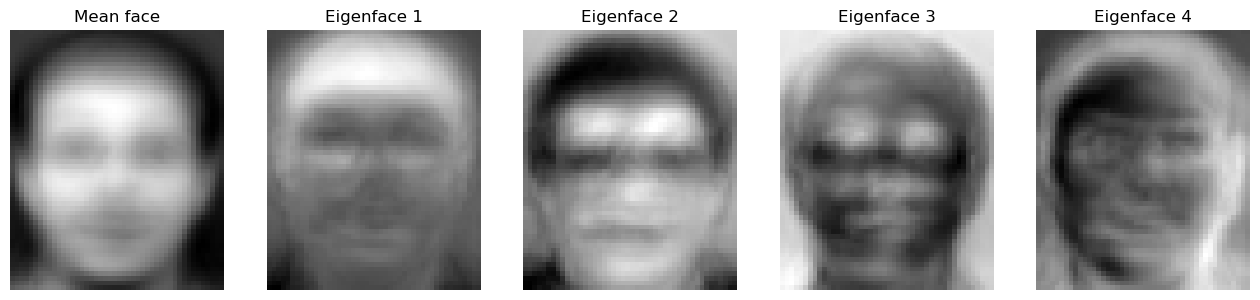

In [16]:
pca = PCA()
X_train_reshape = X_train.reshape(len(Y_train), -1)
pca.fit(X_train_reshape)

plt.figure(figsize=(16, 12))
plt.subplot(1, 5, 1)
plt.axis("off")
plt.title("Mean face")
X_train_0_shape = X_train[0].shape
plt.imshow(pca.mean_.reshape(X_train_0_shape), cmap="gray")

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.axis("off")
    plt.title("Eigenface {}".format(i+1))
    plt.imshow(pca.components_[i].reshape(X_train_0_shape), cmap="gray")

plt.show()

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

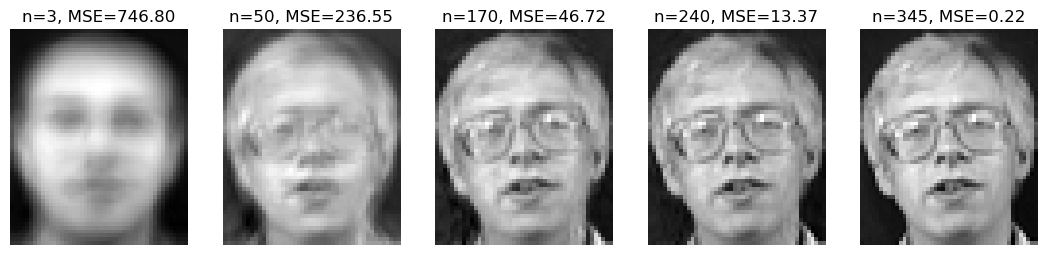

In [40]:
img = cv2.imread('data/2_1.png', cv2.IMREAD_GRAYSCALE).reshape(1, -1)
pca_trans = pca.transform(img)

plt.figure(figsize=(16, 12))
n_components = [3, 50, 170, 240, 345]

for i, n in enumerate(n_components):
    face = np.zeros(img.shape)    
    for j in range(n):
        face = face + pca_trans[0][j] * pca.components_[j]    
    face = face + pca.mean_
    MSE = np.mean((face-img)**2)
    plt.subplot(1, 6, i+1)
    plt.axis("off")    
    plt.title("n={}, MSE={:.2f}".format(n, MSE))
    plt.imshow(face.reshape(X_train[0].shape), cmap="gray")

plt.show()

## 4. cross-validation results

In [47]:
K = [1, 3, 5]
N = [3, 50, 170]

random = np.random.permutation(len(Y_train))
X_train_redu = pca.transform(X_train.reshape(len(Y_train), -1))
X_train_redu_rand = X_train_redu[random]
Y_train_rand = Y_train_arr[random]

for k in K:
    print("k = {}".format(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    for n in N:
        print("  n = {}, ".format(n), end="")
        score = cross_val_score(knn, X_train_redu_rand[:, :n], Y_train_rand, cv=3)
        print("score = {:.4f}".format(score.mean()))  

k = 1
  n = 3, score = 0.7528
  n = 50, score = 0.9750
  n = 170, score = 0.9694
k = 3
  n = 3, score = 0.6639
  n = 50, score = 0.9167
  n = 170, score = 0.8972
k = 5
  n = 3, score = 0.5806
  n = 50, score = 0.8750
  n = 170, score = 0.8417


## 5. recognition rate of the testing set

In [48]:
k = 1
n = 50

X_test_reshape = X_test_arr.reshape(len(Y_test), -1)
X_test_redu = pca.transform(X_test_reshape)

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_redu[:, :n], Y_train_rand) 
knn_score = knn.score(X_test_redu[:, :n], Y_test)

print("accuracy = {}".format(knn_score)) 

accuracy = 0.1
